In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier #分类树
from sklearn.ensemble import RandomForestClassifier #随机森林在ensemble模块下，这里是分类器
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split #划分测试集与分类集
from sklearn.model_selection import cross_val_score #交叉验证
from sklearn import metrics
from sklearn.metrics import classification_report

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset_file = "./stressSensorGait_dataset/normal_gait.csv"
gait = pd.read_csv(dataset_file)


x=gait.iloc[:,[0,1,2,3]]
y=gait.iloc[:,[4]]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [3]:
xtrain.values
xtest.values
ytrain=ytrain.values.ravel()
ytest=ytest.values.ravel()

In [4]:
classifier1 = RandomForestClassifier()
classifier2 = DecisionTreeClassifier()

In [5]:
#RF parameter
parameters1 = {'n_estimators': [30,60,100,200], 
              'max_depth': [9,12,15,20], 
              'max_features' : ['auto', 'log2']
             }
#DT parameter
parameters2 = {'criterion':['gini'],
               'class_weight':['balanced'],
                'max_depth':[10,20,30,40],
               'min_samples_leaf':[1,2,3,5,10],
              }

In [6]:
#rf model
clf = GridSearchCV(classifier1, parameters1, cv=10)#10倍交叉验证
clf.fit(xtrain, ytrain)
print("RF best parameter:",clf.best_params_)

RF best parameter: {'max_depth': 20, 'max_features': 'auto', 'n_estimators': 100}


In [7]:
#RF test set acc
ypred_test=clf.predict(xtest)
accuracy_test=accuracy_score(ytest,ypred_test)
print('RF test set acc：',accuracy_test)

#RF train set acc
ypred_train=clf.predict(xtrain)
accuracy_train=accuracy_score(ytrain,ypred_train)
print('RF train set acc：',accuracy_train)

RF test set acc： 0.9497114591920858
RF train set acc： 1.0


In [8]:
#DT model
rfc = GridSearchCV(classifier2, parameters2, cv=10)
rfc.fit(xtrain, ytrain)
print("DT best parameter:",rfc.best_params_)

DT best parameter: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1}


In [9]:
ypred_train2=rfc.predict(xtrain)
accuracy_train2=accuracy_score(ytrain,ypred_train2)
print('DT train set acc：',accuracy_train2)

ypred_test2=rfc.predict(xtest)
accuracy_test2=accuracy_score(ytest,ypred_test2)
print('DT test set acc：',accuracy_test2)

DT train set acc： 1.0
DT test set acc： 0.9183841714756801


In [10]:
labels = ["walk","run","jump","Upstairs", "Downstairs"]

y_true=ytest
matrix1 = metrics.confusion_matrix(ypred_test, y_true)
matrix2 = metrics.confusion_matrix(ypred_test2, y_true)

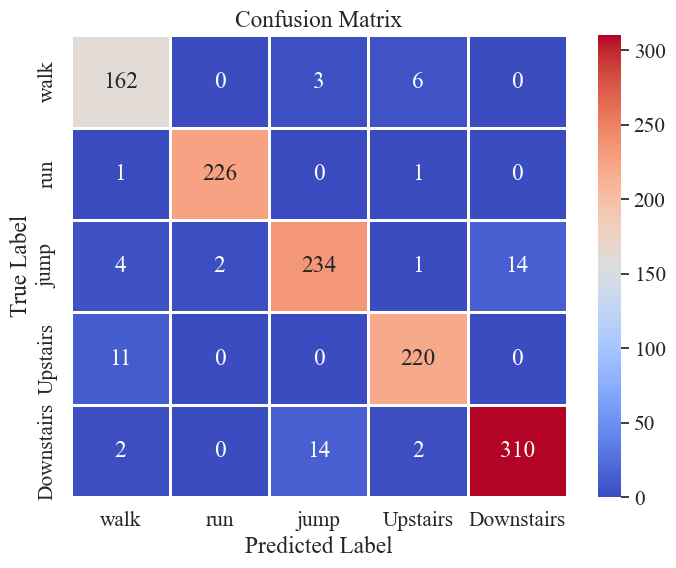

In [11]:
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid",font='Times New Roman',font_scale=1.4)
sns.heatmap(matrix1,
            
            cmap="coolwarm",
            linecolor='white',
            linewidths=1,
            xticklabels=labels,
            yticklabels=labels,
            annot=True,
            fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

imagePath1 = './image/rfNormalGaitConfusionMatrix.jpg'
plt.savefig(imagePath1, dpi=500, bbox_inches = 'tight')
plt.show()


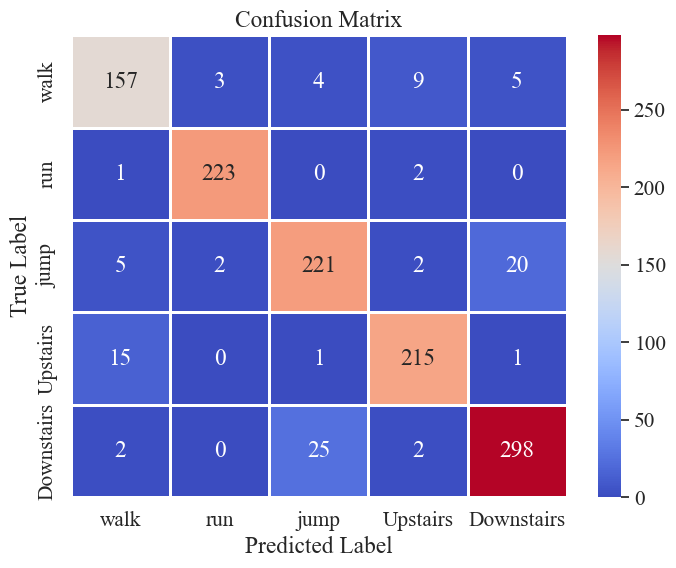

In [12]:
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid",font='Times New Roman',font_scale=1.4)
sns.heatmap(matrix2,
            
            cmap="coolwarm",
            linecolor='white',
            linewidths=1,
            xticklabels=labels,
            yticklabels=labels,
            annot=True,
            fmt="d")

plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

imagePath2 = './image/dtNormalGaitConfusionMatrix.jpg'
plt.savefig(imagePath2, dpi=500, bbox_inches = 'tight')
plt.show()